In [39]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.cross_validation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
#because dataset is skewed we can try out logistic regression with balanced weights
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix



In [67]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    #cls_true = val_Y
    
    # Get the confusion matrix using sklearn.
    #cls_true
    cm = confusion_matrix(y_true=Y_train,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, range(2))
    plt.yticks(tick_marks, range(2))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [12]:
%pylab inline

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split

try:
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
except ImportError:
    # use backports for sklearn 1.4
    # available from https://s3.amazonaws.com/datarobotblog/notebooks/sklearn_backports.py
    from sklearn_backports import PolynomialFeatures
    from sklearn_backports import make_pipeline

# ignore DeprecateWarnings by sklearn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Populating the interactive namespace from numpy and matplotlib


In [13]:
# Import SciKit Learn functions
from sklearn.metrics import roc_curve, auc , roc_auc_score, confusion_matrix, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import grid_search
from sklearn.ensemble import GradientBoostingClassifier 

In [14]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_train.SeriousDlqin2yrs))
    plt.xticks(tick_marks, df_train.SeriousDlqin2yrs, rotation=45)
    plt.yticks(tick_marks, df_train.SeriousDlqin2yrs)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
df_train=pd.read_csv('train_ireg_amd_dmd.csv')
df_test=pd.read_csv('test_ireg_amd_dmd.csv')

In [16]:
df_train.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
5,5,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0
6,6,0,0.305682,57,0,5710.000000,8738.957438,8,0,3,0,0.0
7,7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0
8,8,0,0.116951,27,0,46.000000,3045.627787,2,0,0,0,1.0
9,9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0


In [17]:
#Currently getting subset of data and just wrangling around and trying

Y_train=np.array(df_train.SeriousDlqin2yrs)
#features = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
#            'MonthlyIncome', 'age', 'NumberOfTimes90DaysLate']
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_train=np.array(df_train[features])

In [44]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.10)

In [45]:
GradientBoostingtree = GradientBoostingClassifier(loss='deviance', max_features = 'auto',learning_rate=0.01,n_estimators=2500,max_depth=3)

In [46]:
import pickle

GradientBoostingtree.fit(X_train,Y_train)
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [47]:
filename = 'finalized_model.sav'
pickle.dump(GradientBoostingtree, open(filename, 'wb'))

In [48]:
filename = 'finalized_model.sav'
gb = pickle.load(open(filename, 'rb'))

In [38]:
print features
gb.feature_importances_
d = {'Feature': features, 'Importance': gb.feature_importances_}
dfoutput=pd.DataFrame(d)
dfoutput.sort(columns='Importance',ascending=False)

dfoutput.to_csv('importance.csv',index=False)


['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [49]:
prob=GradientBoostingtree.predict_proba(X_validation)
auc_score=roc_auc_score(Y_validation,prob[:,1])
print "ROC score on model with depth  ",roc_auc_score(Y_validation,prob[:,1])

ROC score on model with depth   0.866265878677


[[93674   786]
 [ 5290  1500]]


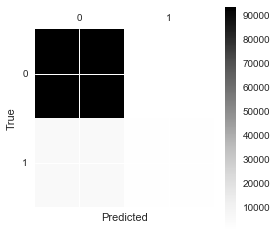

In [68]:

#print X_train
pclass=GradientBoostingtree.predict(X_train)
#cm = confusion_matrix(Y_train,pclass)
#print(cm)
plot_confusion_matrix(pclass)

In [14]:
prob=gb.predict_proba(X_validation)
auc_score=roc_auc_score(Y_validation,prob[:,1])
print "ROC score on model with depth  ",roc_auc_score(Y_validation,prob[:,1])

ROC score on model with depth   0.866365000907


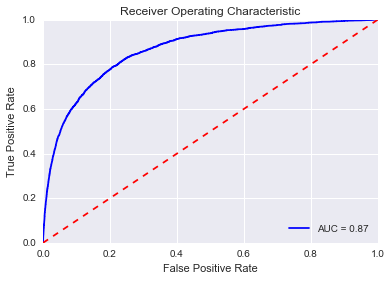

In [24]:
preds = prob[:,1]
fpr, tpr, threshold = roc_curve(Y_validation, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

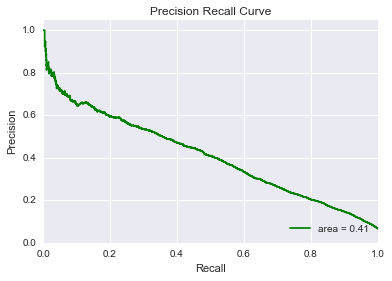

interpretation remaining


In [25]:
precision, recall, _ = precision_recall_curve(Y_validation, preds, pos_label=1)
average_precision = average_precision_score(Y_validation, preds)
plt.plot(recall, precision, label='area = %0.2f' % average_precision, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

print "interpretation remaining"

In [26]:
# lets use best model to learn whole model
X_train_final=np.array(df_train[features])
Y_train_final=np.array(df_train.SeriousDlqin2yrs)
#print X_train_final

model = GradientBoostingClassifier(loss='deviance', max_features = 'auto',learning_rate=0.01,
                                    n_estimators=2500,max_depth=3)

finalmodel=model.fit(X_train_final,Y_train_final)
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_test=np.array(df_test[features])

pred_test=finalmodel.predict_proba(X_test)[:,1]

KeyboardInterrupt: 

In [ ]:
idx=np.arange(1,len(pred_test)+1,1)
print len(pred_test)

#output=np.array()
#output=np.zeros((len(pred_test),2))
#output[:,0]=idx
#output[:,1]=pred_test
output=pd.DataFrame(pred_test)
dfoutput=pd.DataFrame(output)
dfoutput['Id']=idx
dfoutput['Probability']=dfoutput[0]
del dfoutput[0]
dfoutput

In [20]:
dfoutput.to_csv('pred_boosting1.csv',index=False)